In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd

%matplotlib notebook

In [20]:
coord = pd.read_csv('../preprocesses/section_data/net_coord.csv')
coord = coord[["NodeID","CoordX", "CoordY"]].copy()

coord  

### What am I doing? ###
#
#open data file about information of all nodes, using only the coordinates

,NodeID,CoordX,CoordY
0,201827771,912872.500000,450983.331000
1,42784779-SPOTLOAD,553936.808426,146115.680388
2,42933083,888887.500000,326986.330950
3,52894498,804812.500000,578983.330950
4,42805981,554167.347000,145823.926000
5,42875178,819443.716072,539095.272274
6,52061191,824993.716072,311092.272274
7,42762171-SPOTLOAD,554234.887258,145830.116397
8,42773422,554224.880000,146486.816000
9,42774787-SPOTLOAD,554004.786862,145857.488915


In [3]:
subnetwork_connections = pd.read_csv('../preprocesses/section_data/result_subnetwork_connections.csv')

subnetwork_connections = subnetwork_connections[["NodeID", "ConnectorCoordX", "ConnectorCoordY"]].copy()

subnetwork_connections = subnetwork_connections.rename(index=str, columns={"ConnectorCoordX": "CoordX", "ConnectorCoordY": "CoordY"})

subnetwork_connections['NodeID'] = subnetwork_connections['NodeID'].astype(str)

subnetwork_connections

### What am I doing? ###
#
# open file about the subnetwork_connection nodes, changing column names of the coordinates,
# so it fit with the DataFrame of the node coordinates

,NodeID,CoordX,CoordY
0,52878178,553852.639409,145587.960834
1,52878186,553855.073635,145591.289218
2,52878194,553858.725239,145596.282156
3,53071194,553945.141333,145628.150687
4,53071202,553950.054696,145627.476492
5,53071210,553950.894055,145628.785481
6,53071218,553951.144215,145629.175608
7,53071226,553952.233942,145630.875048
8,53071234,553946.251093,145629.881368
9,53071242,553948.454457,145633.317536


In [24]:
intermediate_nodes = pd.read_csv('../preprocesses/section_data/result_intermediate_nodes.csv')


intermediate_nodes = intermediate_nodes[["SectionID","SeqNumber", "CoordX", "CoordY"]].copy()

# intermediate_nodes = intermediate_nodes.rename(index=str, columns={"SectionID": "NodeID"})

intermediate_nodes['SectionID'] = intermediate_nodes['SectionID'].astype(str)

intermediate_nodes

### What am I doing? ###
#
# open file about intermediate nodesm with their SectionID, SeqNumber and each coordinates
#
# Wikipedia: In such a network the source and destination cannot communicate to each other directly because
#            the distance between the source and destination is greater than the transmission range of both of them, 
#            hence the need for intermediate node(s) to relay.

,SectionID,SeqNumber,CoordX,CoordY
0,160232402,0,554220.352,146210.115
1,42559906,0,886902.500,437000.000
2,43966944,0,554328.299,146566.836
3,43966944,1,554335.999,146566.836
4,43966944,2,554336.356,146574.455
5,43966944,3,554331.866,146575.979
6,43966944,4,554324.583,146577.692
7,43966944,5,554319.233,146578.554
8,43966944,6,554313.943,146579.139
9,43966944,7,554306.375,146579.139


In [22]:
frames = [coord,subnetwork_connections]
coord = pd.concat(frames)
coord

### What am I doing? ###
#
# Connect the tables of the nodes and subnetwork nodes: the subnetwork nodes are now twice in the list, one time with
# "wrong" coordinates and one time with the correct ones.

,NodeID,CoordX,CoordY
0,201827771,912872.500000,450983.331000
1,42784779-SPOTLOAD,553936.808426,146115.680388
2,42933083,888887.500000,326986.330950
3,52894498,804812.500000,578983.330950
4,42805981,554167.347000,145823.926000
5,42875178,819443.716072,539095.272274
6,52061191,824993.716072,311092.272274
7,42762171-SPOTLOAD,554234.887258,145830.116397
8,42773422,554224.880000,146486.816000
9,42774787-SPOTLOAD,554004.786862,145857.488915


In [6]:
del_coordX = coord[coord["CoordX"] >= 555000]

del_coord = del_coordX[del_coordX["CoordY"] >= 150000]

#del_coord = del_coord[~del_coord['NodeID'].isin(subnetwork_connections['NodeID'])] # not necessary I guess
#del_coord = del_coord[~del_coord['NodeID'].isin(intermediate_nodes['NodeID'])]


del_coord = pd.DataFrame(del_coord["NodeID"].reset_index(drop=True))
del_coord["NodeID"] = del_coord["NodeID"].astype(str)

#del_coord = del_coord.drop('Index', axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', 6):
    print(del_coord)
    
### What am I doing? ###
#
# Creating a table (del_coord) with all the nodes that are out of the considered intervall
# and have therefore wrong coordinates. 


                  NodeID
0               42933083
1               42875178
2               42891158
3               42902616
4              214656182
5               42895116
6               42940860
7               42952609
8               42967485
9               42946325
10              42937039
11              88865486
12              42944290
13              42875417
14              42981165
15              42943461
16              42875427
17              42981085
18              42934194
19              88868655
20              88868665
21              88868675
22              42881440
23              42965015
24             214590842
25              42905726
26              42891078
27             160233070
28              42891068
29              42905811
30              42876548
31              42905801
32              42936179
33              42972572
34              42902146
35              42965710
36              42949750
37              42974547
38              42958497


In [7]:
section = pd.read_csv('../preprocesses/section_data/result_section.csv')

section = section[["SectionID", "FromNodeID", "ToNodeID"]].copy()

#section = section.rename(index=str, columns={"": "", "": ""})

section

### What am I doing? ###
#
# Table about the connections of each nodes: sections.

,SectionID,FromNodeID,ToNodeID
0,42571222,42901266,42901267
1,42533575,42890834,42890827
2,43939209,42787380,42687308
3,43825506,42698357,42684664
4,43971553,42703621,42694044
5,94588448,52857530,94588294
6,42783662-SPOTLOAD,42783662,42783662-SPOTLOAD
7,43895417,52889602,42697592
8,42533570,42890835,42890827
9,43906026,42785340,42692978


In [8]:
a = del_coord['NodeID']
section['FromNodeID'] = section['FromNodeID'].astype(str)
section['ToNodeID'] = section['ToNodeID'].astype(str)

section_2 = section[~section['FromNodeID'].isin(del_coord['NodeID'])]

section_3 = section_2[~section_2['ToNodeID'].isin(del_coord['NodeID'])]

section_3 = section_3.reset_index(drop=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', 5):
    print(section_3)
    
### What am I doing? ###
#
# Deleting the sections between Nodes that are out of the considered intervall, with the table del_coord,
# for both: the FromNodeID and the ToNodeID. 

                              SectionID FromNodeID  \
0                              43939209   42787380   
1                              43825506   42698357   
2                              43971553   42703621   
3                              94588448   52857530   
4                     42783662-SPOTLOAD   42783662   
5                              43906026   42785340   
6                              43939204   42660293   
7                     42787380-SPOTLOAD   42787380   
8                              43884803   42686073   
9                     42769314-SPOTLOAD   42769314   
10                             43825618   42699677   
11                    42777729-SPOTLOAD   42777729   
12     42783662-30148539-PHOTOVOLTAIQUE   42783662   
13                             43906704   42660293   
14                             43971551   52101382   
15                             94588357   94588294   
16     42787380-30149520-PHOTOVOLTAIQUE   42787380   
17                          

In [9]:
in_coord = coord[~coord['NodeID'].isin(del_coord['NodeID'])]

in_coord = in_coord[in_coord['CoordX'] <= 565000] 
# The subnetwork_connections appear with "wrong" and "correct" coordinates
# so the wrong entries have to be deleted again (maybe there is a smarter way to do it)

with pd.option_context('display.max_rows', None, 'display.max_columns', 8):
    print(in_coord.reset_index(drop=True))

### What am I doing ###
#
# New table of Nodes with their coordinates, which contains only the "correct" nodes, by deleting every entry that is in
# the table of "wrong" nodes.

                                 NodeID         CoordX         CoordY
0                     42784779-SPOTLOAD  553936.808426  146115.680388
1                              42805981  554167.347000  145823.926000
2                     42762171-SPOTLOAD  554234.887258  145830.116397
3                              42773422  554224.880000  146486.816000
4                     42774787-SPOTLOAD  554004.786862  145857.488915
5                              42800598  554172.665000  145749.726000
6                              42826835  554213.574000  146132.659000
7                              42684822  554202.296000  145812.842000
8                              42692306  553907.670000  146018.676000
9                              42793458  554020.032000  145979.088000
10                             42677448  553987.234000  146063.703000
11                            160381938  553708.694000  145882.643000
12                             42689099  554258.868000  145618.281000
13                  

In [10]:
DG = nx.DiGraph()

### What am I doing? ###
#
# Creating a directed graph

In [11]:
pos = {}
pos = {row["NodeID"]: (row["CoordX"],row["CoordY"]) for _,row in in_coord.iterrows()}

node_spotload = in_coord[in_coord["NodeID"].str.contains("SPOTLOAD")]
node_pv = in_coord[in_coord["NodeID"].str.contains("PHOTOVOLTAIQUE")]
node_subn = in_coord[in_coord['NodeID'].isin(subnetwork_connections['NodeID'])]
node_interm = in_coord[in_coord['NodeID'].isin(intermediate_nodes['NodeID'])]

frames = [node_spotload, node_pv, node_subn, node_interm]
node_spec = pd.concat(frames)

node_rest = in_coord[~in_coord["NodeID"].isin(node_spec)]


color_spotload = {}
color_spotload = {row["NodeID"]: "blue" for _,row in node_spotload.iterrows()}
color_pv = {}
color_pv = {row["NodeID"]: "yellow" for _,row in node_pv.iterrows()}
color_rest = {}
color_rest = {row["NodeID"]: "red" for _,row in node_rest.iterrows()}
color_subnet = {}
color_subnet = {row["NodeID"]: "purple" for _,row in node_subn.iterrows()}
color_interm = {}
color_interm = {row["NodeID"]: "lightgreen" for _,row in node_interm.iterrows()}

color_map = {}
color_map.update(color_rest)
color_map.update(color_interm)
color_map.update(color_subnet)
color_map.update(color_spotload)
color_map.update(color_pv)


DG.add_nodes_from(pos.keys())

nx.set_node_attributes(DG, pos, 'coordinates')
#nx.set_node_attributes(DG, color_map, 'node_typ')

values = [color_map.get(node) for node in DG.nodes()]

color_map

### What am I doing? ###
#
# 1) Classification of the nodes by searching for NodeID that contains the words SPOTLOAD or PHOTOVOLTAIQUE,
#    or are listed in the table: subnetwork_connections. The rest nodes are seen as "common nodes"
# 2) Giving each Node type a color
# 3) Creating a list for the colors, which is required for NetworkX

{'42784779-SPOTLOAD': 'blue',
 '42805981': 'red',
 '42762171-SPOTLOAD': 'blue',
 '42773422': 'red',
 '42774787-SPOTLOAD': 'blue',
 '42800598': 'red',
 '42826835': 'red',
 '42684822': 'red',
 '42692306': 'red',
 '42793458': 'red',
 '42677448': 'red',
 '160381938': 'red',
 '42689099': 'red',
 '42767560-SPOTLOAD': 'blue',
 '42687144': 'red',
 '42784354': 'red',
 '42688342': 'red',
 '42774597': 'red',
 '42832294': 'red',
 '42772657': 'red',
 '42789009': 'red',
 '42791070-SPOTLOAD': 'blue',
 '42766857-SPOTLOAD': 'blue',
 '42770529': 'red',
 '42679006': 'red',
 '42765005': 'red',
 '42769631-SPOTLOAD': 'blue',
 '42683455': 'red',
 '42678666': 'red',
 '42770999-SPOTLOAD': 'blue',
 '42689059': 'red',
 '42758557': 'red',
 '42759255-SPOTLOAD': 'blue',
 '42681953': 'red',
 '42684673': 'red',
 '42793708': 'red',
 '42781025': 'red',
 '42700438': 'red',
 '42718174': 'red',
 '42817313': 'red',
 '42791308': 'red',
 '210781646': 'red',
 '42772127': 'red',
 '137939855': 'red',
 '42681395': 'red',
 '42766

In [12]:
lines = [(row["FromNodeID"], row["ToNodeID"]) for _, row in section_3.iterrows()]

DG.add_edges_from(lines)

### What am I doing? ###
#
# Defining the edges with the table of section_3, where only the connection of nodes are given which are in the
# considered intervall

In [13]:
aaa_nodes = list(section_3.FromNodeID.unique())
aaa_nodes += list(section_3.ToNodeID.unique())

bbb_nodes = []
for (node_in, node_out) in lines:
    bbb_nodes.append(node_in)
    bbb_nodes.append(node_out)

print(len(set(aaa_nodes)))
print(len(set(bbb_nodes)))


2458
2458


In [14]:
list(DG.nodes)

['42784779-SPOTLOAD',
 '42805981',
 '42762171-SPOTLOAD',
 '42773422',
 '42774787-SPOTLOAD',
 '42800598',
 '42826835',
 '42684822',
 '42692306',
 '42793458',
 '42677448',
 '160381938',
 '42689099',
 '42767560-SPOTLOAD',
 '42687144',
 '42784354',
 '42688342',
 '42774597',
 '42832294',
 '42772657',
 '42789009',
 '42791070-SPOTLOAD',
 '42766857-SPOTLOAD',
 '42770529',
 '42679006',
 '42765005',
 '42769631-SPOTLOAD',
 '42683455',
 '42678666',
 '42770999-SPOTLOAD',
 '42689059',
 '42758557',
 '42759255-SPOTLOAD',
 '42681953',
 '42684673',
 '42793708',
 '42781025',
 '42700438',
 '42718174',
 '42817313',
 '42791308',
 '210781646',
 '42772127',
 '137939855',
 '42681395',
 '42766495',
 '42782565',
 '42788149',
 '42669859',
 '42763745-SPOTLOAD',
 '42781803',
 '42678156',
 '42678176',
 '42717213',
 '42778548-SPOTLOAD',
 '42768460-SPOTLOAD',
 '42850992',
 '42673347',
 '42777658',
 '148905331-SPOTLOAD',
 '42669373',
 '42702056',
 '42681873',
 '137009437',
 '42683854',
 '42709231',
 '42770948',
 '42668

In [15]:
list(DG.edges)

[('42805981', '42699495'),
 ('42773422', '42773422-SPOTLOAD'),
 ('42800598', '42788149'),
 ('42826835', '52066197'),
 ('42684822', '42687397'),
 ('42684822', '42679054'),
 ('42692306', '42778749'),
 ('42692306', '42686668'),
 ('42793458', '42793458-SPOTLOAD'),
 ('42677448', '42678541'),
 ('42687144', '42793910'),
 ('42687144', '52865586'),
 ('42784354', '42784354-SPOTLOAD'),
 ('42688342', '42695204'),
 ('42688342', '214665470'),
 ('42774597', '42774597-SPOTLOAD'),
 ('42774597', '42680037'),
 ('42772657', '42694761'),
 ('42772657', '42772657-SPOTLOAD'),
 ('42789009', '42789009-SPOTLOAD'),
 ('42770529', '42696931'),
 ('42770529', '42770529-SPOTLOAD'),
 ('42679006', '42695204'),
 ('42765005', '42765005-SPOTLOAD'),
 ('42689059', '52101660'),
 ('42689059', '42781958'),
 ('42758557', '42698716'),
 ('42758557', '42758557-SPOTLOAD'),
 ('42684673', '42698807'),
 ('42684673', '42677480'),
 ('42793708', '42793708-SPOTLOAD'),
 ('42793708', '42799318'),
 ('42781025', '42680457'),
 ('42781025', '427

In [16]:
DG.number_of_nodes()

3744

In [17]:
DG.number_of_edges()

1934

<IPython.core.display.Javascript object>


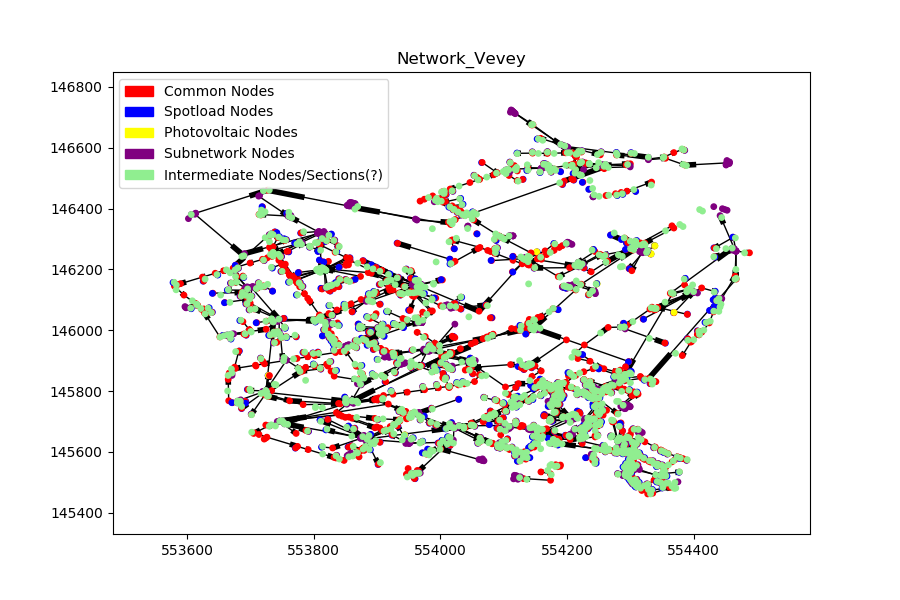

In [18]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(1, figsize=(9.0, 6.0))

nx.draw_networkx(DG, pos, node_color=values, with_labels=False,node_size=15)
plt.title('Network_Vevey')
#plt.ylim((145400, 146800))
#plt.xlim((553500, 554500))

red = mpatches.Patch(color="red", label='Common Nodes')
blue = mpatches.Patch(color="blue", label='Spotload Nodes')
yellow = mpatches.Patch(color="yellow", label='Photovoltaic Nodes')
purple = mpatches.Patch(color="purple", label='Subnetwork Nodes')
lightgreen = mpatches.Patch(color="lightgreen", label ='Intermediate Nodes/Sections(?)')
plt.legend(handles=[red, blue, yellow, purple, lightgreen])

plt.show()
plt.savefig('vevey_network.pdf')

### What am I doing? ###
#
# Draw graph, with attribut of the pos (coordinates) and the node_color

<IPython.core.display.Javascript object>


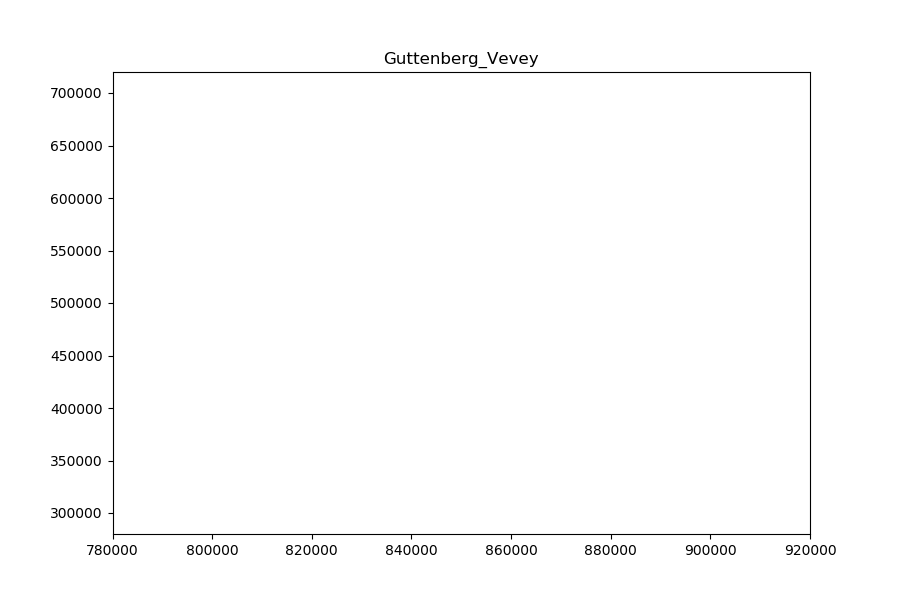

In [19]:
#nx.draw(DG,pos,with_labels=False, arrows=True)
plt.figure(2, figsize=(9.0, 6.0))

nx.draw_networkx(DG,pos, with_labels=False)
plt.title('Guttenberg_Vevey')
plt.ylim((280000, 720000))
plt.xlim((780000, 920000))
plt.show()

### What am I doing? ###
#
# Second draw of the intervall that is not to be considered, to check if "wrong" nodes appear.